In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def get_filter_output(input_img_path, filter):
  img = plt.imread(input_img_path)
  filter_size = filter.shape[0]
  pad_width = (filter_size-1)//2
  if len(img.shape)==3:
    filter_3D = np.stack((filter, filter, filter), axis=2)
    temp = np.pad(img, ((pad_width, pad_width), (pad_width, pad_width), (0, 0)), mode='constant', constant_values=0)
    temp = np.array([[np.sum(np.multiply(temp[i:i+filter_size, j:j+filter_size, :], filter_3D)) for j in range(temp.shape[1]-filter_size+1)] for i in range(temp.shape[0]-filter_size+1)])
  else:
    temp = np.pad(img, ((pad_width, pad_width), (pad_width, pad_width)), mode='constant', constant_values=0)
    temp = np.array([[np.sum(np.multiply(temp[i:i+filter_size, j:j+filter_size], filter)) for j in range(temp.shape[1]-filter_size+1)] for i in range(temp.shape[0]-filter_size+1)])
    
  temp[temp>255] = 255
  temp[temp<0] = 0
  plt.imshow(temp, cmap='gray')
  return temp
  

In [0]:
filter = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
#filter = np.array([[1,2,3],[4,5,6],[7,8,9],[9,4,7]])

In [0]:
file_path = "drive/My Drive/Colab Notebooks/vh.jpg"

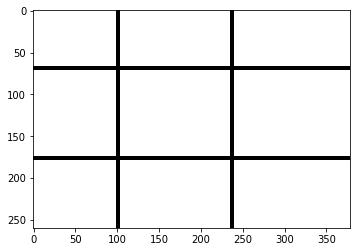

In [55]:
plt.imshow(plt.imread(file_path))

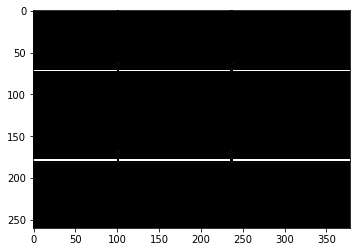

In [56]:
horiz_out_pos_grad = get_filter_output(file_path, filter.T)

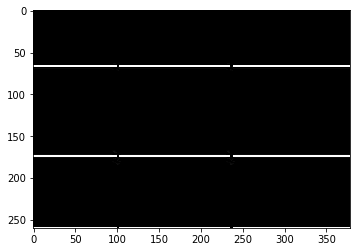

In [57]:
horiz_out_neg_grad = get_filter_output(file_path, np.flip(filter.T))

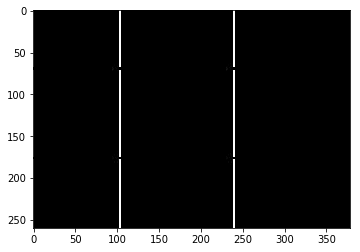

In [58]:
vert_out_pos_grad = get_filter_output(file_path, filter)

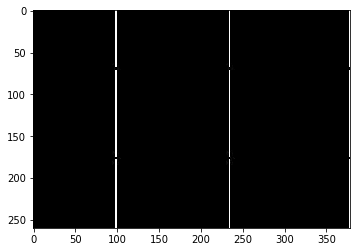

In [59]:
vert_out_neg_grad = get_filter_output(file_path, np.flip(filter))